# Linear Regression

Build a simple example of Linear Regression using standard formulas and sklearn regression module.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Generate data

We will generate the linear correlation data with some noise in order to check our models.

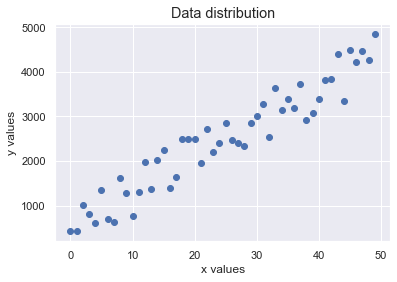

In [2]:
x = np.arange(50)
y = np.random.randint(1,600,size=50)*2  + np.random.randint(1,100)*x
plt.xlabel("x values")
plt.ylabel("y values")
plt.title('Data distribution', fontsize='large')
plt.scatter(x,y);

## Building a model

### Calculating intercept and slope manually.

Calculate intercept and slope using formulas: 

${b} = \frac{n{\sum{xy}} - \sum{x}\sum{y}} {{n}\sum{x^2} - (\sum{x})^2}\$ - slope

${a} = \frac{\sum{y} - {b}\sum{x}}n\$ - intercept

In [3]:
def slope(x, y):
    n = len(x)
    sum_xy = n * np.sum(x * y)
    sum_x_sum_y = x.sum() * y.sum()
    sum_x_squared = n * np.sum(x ** 2)
    squared_sum_x = x.sum() ** 2
    b = (sum_xy - sum_x_sum_y) / (sum_x_squared - squared_sum_x)
    return np.round(b, 4)



def intercept(x, y):
    n, b = len(x), slope(x, y)
    sum_y = y.sum()
    b_sum_x = b * x.sum()
    a = (sum_y - b_sum_x) / n
    return np.round(a, 4)
b, a = slope(x, y), intercept(x, y)
print('Calculated intercept: {}'.format(a))
print('Calculated slope: {}'.format(b))

Calculated intercept: 558.2249
Calculated slope: 78.7247


Make `y_calculated` using calculated parameters.

In [4]:
y_calculated = a + b*x

### Make a Linear Regression model.

Make a Linear Regression model using sklearn library.

In [5]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#reshape the data in order to be able to use it into the model
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

#prepare the model
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Intercept:{}'.format(model.intercept_))
print('Slope:{}'.format(model.coef_))

Intercept:547.8782957144635
Slope:[78.99514176]


## Plot results

Let's check how our calculated and trained regression lines fit the distribution.

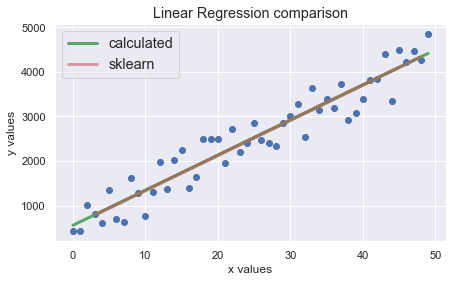

In [6]:
plt.figure(figsize=(7,4))
plt.title('Linear Regression comparison',fontsize='large')
plt.scatter(x, y);
plt.plot(x, y_calculated, color='g',linewidth=3, label='calculated');
plt.plot(x_test, predictions, color='r', alpha=0.5, linewidth=3, label='sklearn')
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend(fontsize='large');

As we see according to the plotted results, both lines are more or less fit the distribution.